In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with open('data/Vehicle Insurance Case Fraud (1).csv') as f:
    x = pd.read_csv(f)

In [3]:
x.head()

,ï»¿Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
x.shape

(15420, 33)

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ï»¿Month              15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
x.isnull().sum()

ï»¿Month                0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

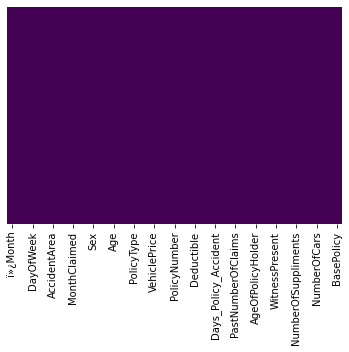

In [7]:
sns.heatmap(x.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [8]:
x.Fault.unique()

array(['Policy Holder', 'Third Party'], dtype=object)

In [9]:
x.PolicyType.unique()

array(['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
       'Utility - All Perils', 'Sedan - All Perils', 'Sedan - Collision',
       'Utility - Collision', 'Utility - Liability', 'Sport - All Perils'],
      dtype=object)

## Explanatory Data Analysis

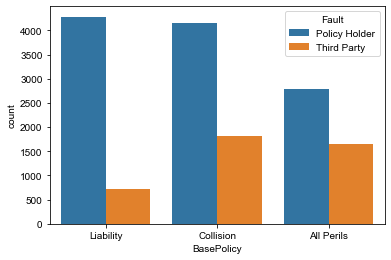

In [10]:
sns.countplot(x = 'BasePolicy', hue = 'Fault', data = x)
sns.set_style('darkgrid')

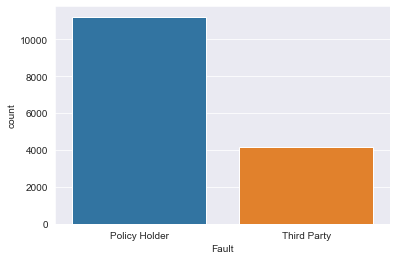

In [11]:
sns.countplot(x = 'Fault', data = x)

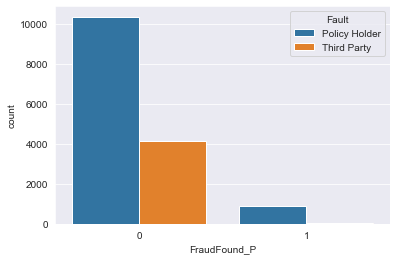

In [12]:
sns.countplot(x = 'FraudFound_P', hue = 'Fault', data = x)

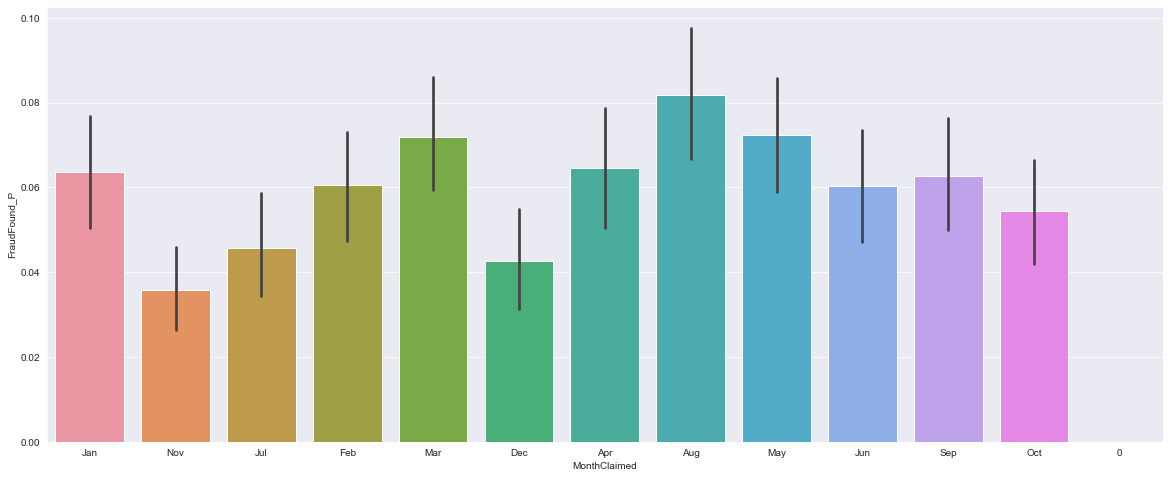

In [13]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'MonthClaimed', y = 'FraudFound_P', data = x)

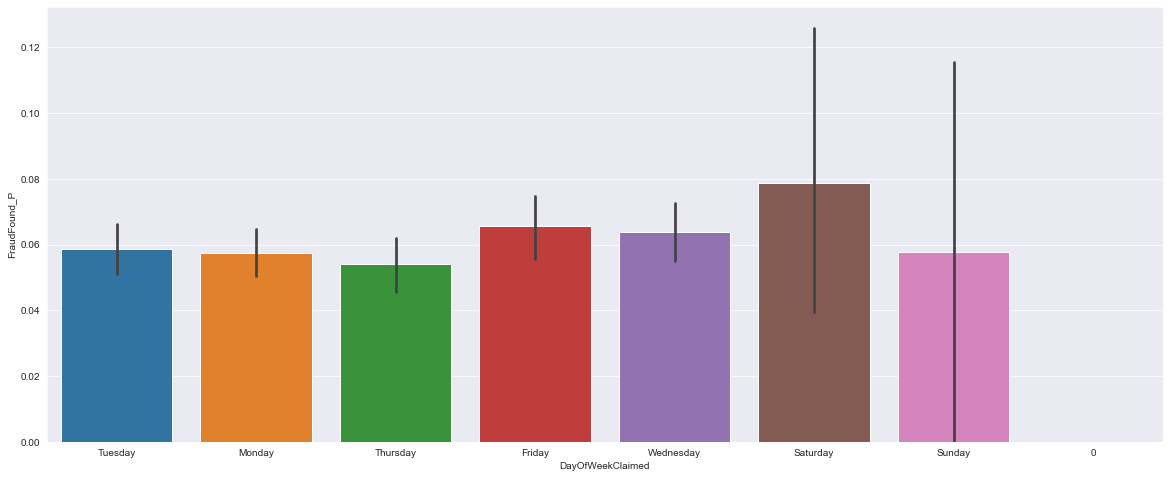

In [14]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'DayOfWeekClaimed', y = 'FraudFound_P', data = x)

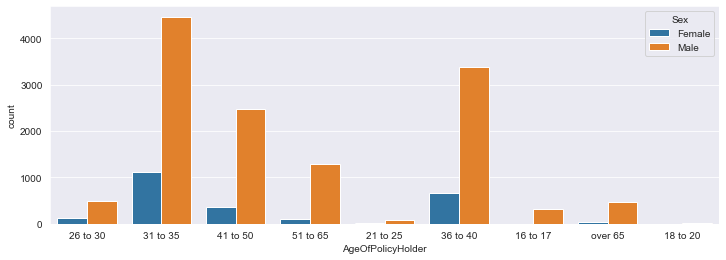

In [15]:
plt.figure(figsize = (12, 4))
sns.countplot(x = 'AgeOfPolicyHolder', hue = 'Sex', data = x)

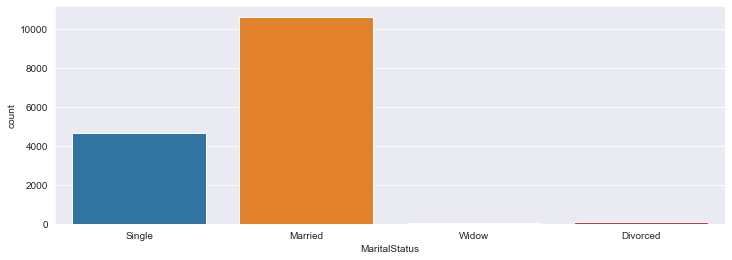

In [16]:
plt.figure(figsize = (12, 4))
sns.countplot(x = 'MaritalStatus', data = x)

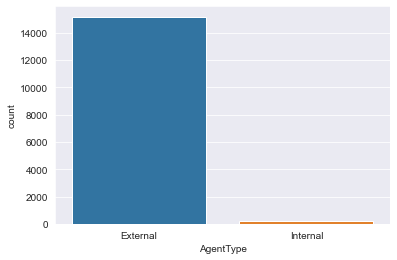

In [17]:
sns.countplot(x = 'AgentType', data = x)

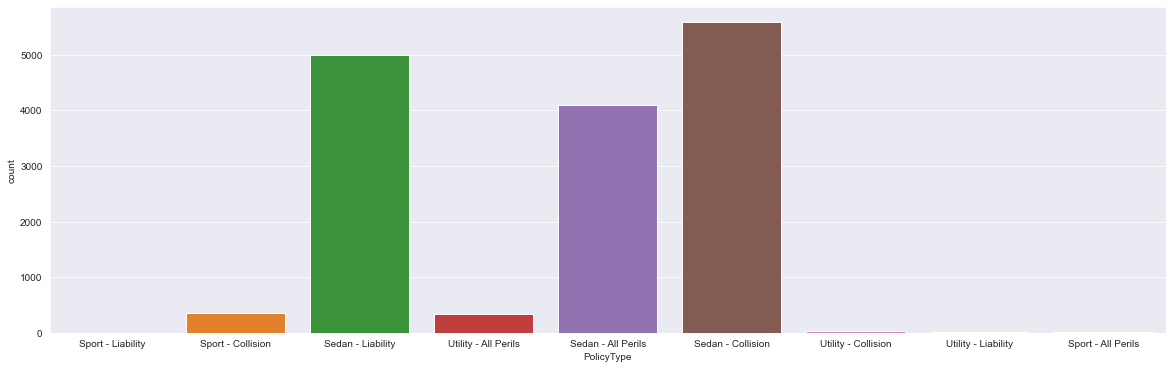

In [18]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'PolicyType', data = x)

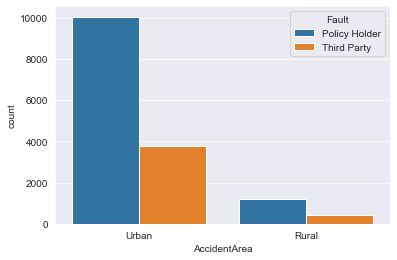

In [19]:
sns.countplot(x = 'AccidentArea', hue = 'Fault', data = x)

### Feature Engineering

In [20]:
dx = x.drop(['ï»¿Month', 'DayOfWeek', 'Make', 'Year'], axis = 1)

In [21]:
dx.head(2)

,WeekOfMonth,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,5,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,3,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision


In [22]:
def change(name):
    if name == 'more than 69000':
        return 'Vehicle_price_A'
    elif name == '20000 to 29000':
        return 'Vehicle_price_B'
    elif name == '30000 to 39000':
        return 'Vehicle_price_C'
    elif name == 'less than 20000':
        return 'Vehicle_price_D'
    elif name == '40000 to 59000':
        return 'Vehicle_price_E'
    elif name == '60000 to 69000':
        return 'Vehicle_price_F'
    else:
        return None
    
dx['VehiclePrice'] = dx.VehiclePrice.apply(change)

In [23]:
def change(name):
    if name == 'more than 30':
        return 'Days_policy_Accident_A'
    elif name == '15 to 30':
        return 'Days_policy_Accident_B'
    elif name == 'none':
        return 'Days_policy_Accident_C'
    elif name == '1 to 7':
        return 'Days_policy_Accident_D'
    elif name == '8 to 15':
        return 'Days_policy_Accident_E'
    else:
        return None
    
dx['Days_Policy_Accident'] = dx.Days_Policy_Accident.apply(change)

In [24]:
def change(name):
    if name == 'more than 30':
        return 'Days_policy_claim_A'
    elif name == '15 to 30':
        return 'Days_policy_claim_B'
    elif name == '8 to 15':
        return 'Days_policy_claim_C'
    elif name == 'none':
        return 'Days_policy_claim_D'
    else:
        return None
    
dx['Days_Policy_Claim'] = dx.Days_Policy_Claim.apply(change)

In [25]:
def change(name):
    if name == 'none':
        return 'Past Number of Claims A'
    elif name == '1':
        return 'Past Number of Claims B'
    elif name == '2 to 4':
        return 'Past Number of Claims C'
    elif name == 'more than 4':
        return 'Past Number of Claims D'
    else:
        return None
    
dx['PastNumberOfClaims'] = dx.PastNumberOfClaims.apply(change)

In [26]:
def change(name):
    if name == '3 years':
        return 'Age of Vehicle A'
    elif name == '6 years':
        return 'Age of Vehicle B'
    elif name == '7 years':
        return 'Age of Vehicle C'
    elif name == 'more than 7':
        return 'Age of Vehicle D'
    elif name == '5 years':
        return 'Age of Vehicle E'
    elif name == 'new':
        return 'Age of Vehicle F'
    elif name == '4 years':
        return 'Age of Vehicle G'
    elif name == '2 years':
        return 'Age of Vehicle H'
    else:
        return None
    
dx['AgeOfVehicle'] = dx.AgeOfVehicle.apply(change)

In [27]:
def change(name):
    if name == '26 to 30':
        return 'Age of Policy Holder A'
    elif name == '31 to 35':
        return 'Age of Policy Holder B'
    elif name == '41 to 50':
        return 'Age of Policy Holder C'
    elif name == '51 to 65':
        return 'Age of Policy Holder D'
    elif name == '21 to 25':
        return 'Age of Policy Holder E'
    elif name == '36 to 40':
        return 'Age of Policy Holder F'
    elif name == '16 to 17':
        return 'Age of Policy Holder G'
    elif name == 'over 65':
        return 'Age of Policy Holder H'
    elif name == '18 to 20':
        return 'Age of Policy Holder I'
    else:
        return None
    
dx['AgeOfPolicyHolder'] = dx.AgeOfPolicyHolder.apply(change)

In [28]:
def change(name):
    if name == 'none':
        return 'Number of Suppliments A'
    elif name == 'more than 5':
        return 'Number of Suppliments B'
    elif name == '3 to 5':
        return 'Number of Suppliments C'
    elif name == '1 to 2':
        return 'Number of Suppliments D'
    else:
        return None
    
dx['NumberOfSuppliments'] = dx.NumberOfSuppliments.apply(change)

In [29]:
def change(name):
    if name == '1 year':
        return 'Address Change Claim A'
    elif name == 'no change':
        return 'Address Change Claim B'
    elif name == '4 to 8 years':
        return 'Address Change Claim C'
    elif name == '2 to 3 years':
        return 'Address Change Claim D'
    elif name == 'under 6 months':
        return 'Address Change Claim E'
    else:
        return None
    
dx['AddressChange_Claim'] = dx.AddressChange_Claim.apply(change)

In [30]:
def change(name):
    if name == '3 to 4':
        return 'Number of Cars A'
    elif name == '1 vehicle':
        return 'Number of Cars B'
    elif name == '2 vehicles':
        return 'Number of Cars C'
    elif name == '5 to 8':
        return 'Number of Cars D'
    elif name == 'more than 8':
        return 'Number of Cars E'
    else:
        return None
    
dx['NumberOfCars'] = dx.NumberOfCars.apply(change)

In [31]:
dummies = pd.get_dummies(dx[['AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'PolicyType', 'VehicleCategory','VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']], drop_first= True)

In [32]:
dx = pd.concat([dx, dummies], axis = 1)

In [33]:
dx.head(2)

,WeekOfMonth,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,...,AddressChange_Claim_Address Change Claim B,AddressChange_Claim_Address Change Claim C,AddressChange_Claim_Address Change Claim D,AddressChange_Claim_Address Change Claim E,NumberOfCars_Number of Cars B,NumberOfCars_Number of Cars C,NumberOfCars_Number of Cars D,NumberOfCars_Number of Cars E,BasePolicy_Collision,BasePolicy_Liability
0,5,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,...,0,0,0,0,0,0,0,0,0,1
1,3,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,...,1,0,0,0,1,0,0,0,1,0


In [34]:
dx = dx.drop(['AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'PolicyType', 'VehicleCategory','VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy'], axis = 1)

In [35]:
dx.head(2)

,WeekOfMonth,WeekOfMonthClaimed,Age,Fault,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,AccidentArea_Urban,...,AddressChange_Claim_Address Change Claim B,AddressChange_Claim_Address Change Claim C,AddressChange_Claim_Address Change Claim D,AddressChange_Claim_Address Change Claim E,NumberOfCars_Number of Cars B,NumberOfCars_Number of Cars C,NumberOfCars_Number of Cars D,NumberOfCars_Number of Cars E,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,Policy Holder,0,1,12,300,1,1,...,0,0,0,0,0,0,0,0,0,1
1,3,4,34,Policy Holder,0,2,15,400,4,1,...,1,0,0,0,1,0,0,0,1,0


In [36]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 89 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   WeekOfMonth                                  15420 non-null  int64 
 1   WeekOfMonthClaimed                           15420 non-null  int64 
 2   Age                                          15420 non-null  int64 
 3   Fault                                        15420 non-null  object
 4   FraudFound_P                                 15420 non-null  int64 
 5   PolicyNumber                                 15420 non-null  int64 
 6   RepNumber                                    15420 non-null  int64 
 7   Deductible                                   15420 non-null  int64 
 8   DriverRating                                 15420 non-null  int64 
 9   AccidentArea_Urban                           15420 non-null  uint8 
 10  DayOfWeekC

In [37]:
X = dx.drop('Fault', axis = 1)
y = dx.Fault

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scale = StandardScaler()

In [40]:
ds = scale.fit_transform(X)

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components= 12)

In [43]:
x_pca = pca.fit_transform(ds)

In [44]:
X = x_pca
y = dx.Fault

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
from sklearn.svm import SVC

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
lr = LogisticRegression()

In [53]:
dtc = DecisionTreeClassifier()

In [54]:
rfc = RandomForestClassifier(n_estimators=300)

In [55]:
svc = SVC()

In [56]:
knn = KNeighborsClassifier(n_neighbors=1)

In [57]:
lr.fit(X_train, y_train)

LogisticRegression()

In [58]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [60]:
svc.fit(X_train, y_train)

SVC()

In [61]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [62]:
pred = lr.predict(X_test)

In [63]:
prediction = dtc.predict(X_test)

In [64]:
preds = rfc.predict(X_test)

In [65]:
predictions = svc.predict(X_test)

In [66]:
predicts = knn.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
print('Logistic Regressor accuracy score: ', accuracy_score(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

Logistic Regressor accuracy score:  0.717682663207955


[[3315   10]
 [1296    5]]


               precision    recall  f1-score   support

Policy Holder       0.72      1.00      0.84      3325
  Third Party       0.33      0.00      0.01      1301

     accuracy                           0.72      4626
    macro avg       0.53      0.50      0.42      4626
 weighted avg       0.61      0.72      0.60      4626



In [69]:
print('Decision Tree accuracy score: ', accuracy_score(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

Decision Tree accuracy score:  0.6171638564634674


[[2399  926]
 [ 845  456]]


               precision    recall  f1-score   support

Policy Holder       0.74      0.72      0.73      3325
  Third Party       0.33      0.35      0.34      1301

     accuracy                           0.62      4626
    macro avg       0.53      0.54      0.54      4626
 weighted avg       0.62      0.62      0.62      4626



In [70]:
print('Random Forest Classifier accuracy score: ', accuracy_score(y_test, preds))
print('\n')
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

Random Forest Classifier accuracy score:  0.7159533073929961


[[3181  144]
 [1170  131]]


               precision    recall  f1-score   support

Policy Holder       0.73      0.96      0.83      3325
  Third Party       0.48      0.10      0.17      1301

     accuracy                           0.72      4626
    macro avg       0.60      0.53      0.50      4626
 weighted avg       0.66      0.72      0.64      4626



[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

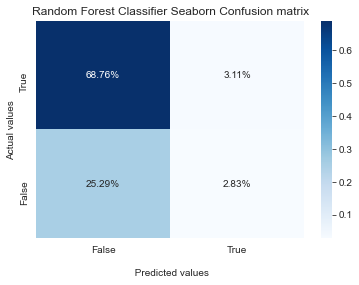

In [71]:
ax = sns.heatmap(confusion_matrix(y_test, preds)/ np.sum(confusion_matrix(y_test, preds)), annot = True, cmap = 'Blues', fmt = '.2%')
ax.set_title('Random Forest Classifier Seaborn Confusion matrix')
ax.set_xlabel('\n Predicted values')
ax.set_ylabel('Actual values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['True', 'False'])

In [72]:
print('SVC accuracy score: ', accuracy_score(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

SVC accuracy score:  0.7189796800691742


[[3317    8]
 [1292    9]]


               precision    recall  f1-score   support

Policy Holder       0.72      1.00      0.84      3325
  Third Party       0.53      0.01      0.01      1301

     accuracy                           0.72      4626
    macro avg       0.62      0.50      0.42      4626
 weighted avg       0.67      0.72      0.60      4626



In [73]:
print('KNeighbors accuracy score: ', accuracy_score(y_test, predicts))
print('\n')
print(confusion_matrix(y_test, predicts))
print('\n')
print(classification_report(y_test, predicts))

KNeighbors accuracy score:  0.6214872460008647


[[2457  868]
 [ 883  418]]


               precision    recall  f1-score   support

Policy Holder       0.74      0.74      0.74      3325
  Third Party       0.33      0.32      0.32      1301

     accuracy                           0.62      4626
    macro avg       0.53      0.53      0.53      4626
 weighted avg       0.62      0.62      0.62      4626



[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

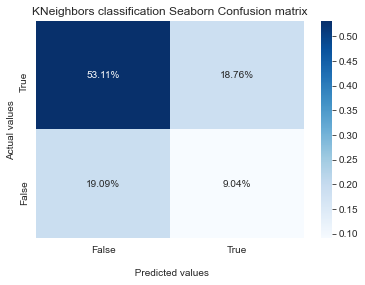

In [74]:
ax = sns.heatmap(confusion_matrix(y_test, predicts)/ np.sum(confusion_matrix(y_test, predicts)), annot = True, cmap = 'Blues', fmt = '.2%')
ax.set_title('KNeighbors classification Seaborn Confusion matrix')
ax.set_xlabel('\n Predicted values')
ax.set_ylabel('Actual values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['True', 'False'])

### Explanatory Data Analysis

Drawing my conlusion with the Decision tree model as a result of it's performance compared to the other models and using the recall result of the classification of report.

In [77]:
Policy_Holder = 0.72
Third_Party = 0.35
Total = Policy_Holder + Third_Party

In [78]:
Policy_Holder_percentage_rate = np.round((Policy_Holder / Total) * 100, 1)
Third_Party_percentage_rate = np.round((Third_Party / Total) * 100, 1)

In [79]:
print('Percentage rate of Policy Holder: ', Policy_Holder_percentage_rate)
print('\n')
print('Percentage rate of Third Party: ', Third_Party_percentage_rate)

Percentage rate of Policy Holder:  67.3


Percentage rate of Third Party:  32.7


In [80]:
plot = pd.DataFrame({'Fault': ['Policy Holder', 'Third Party'],
                    'Rate (%)': [67.3, 32.7]})

In [81]:
plot

,Fault,Rate (%)
0,Policy Holder,67.3
1,Third Party,32.7


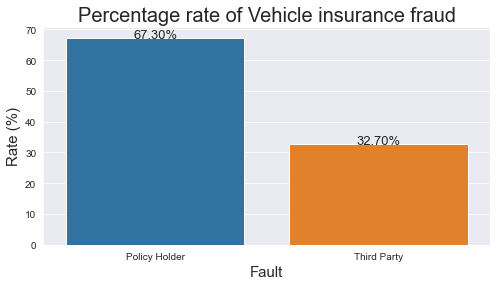

In [85]:
plt.figure(figsize = (8, 4))
ax = sns.barplot(x = 'Fault', y = 'Rate (%)', data = plot)
plt.title('Percentage rate of Vehicle insurance fraud', fontsize = 20)
plt.xlabel('Fault', fontsize = 15)
plt.ylabel('Rate (%)', fontsize = 15)

for p in ax.patches:
    percentage = '{:.2f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center', size = 13)